In [1]:
import networkx as nx
import syft as sy
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(40, 20))

from syft.service.action.action_graph_service import ActionGraphService
from syft.service.action.action_graph import InMemoryActionGraphStore, InMemoryGraphConfig, InMemoryStoreClientConfig
from syft.service.context import AuthedServiceContext
from syft.node.credentials import SyftSigningKey
from syft.service.action.action_graph import Action
from syft.service.action.numpy import NumpyArrayObject, ActionObject

print(sy.__version__)

kj/filesystem-disk-unix.c++:1703: warning: PWD environment variable doesn't match current directory; pwd = /home/dk/Desktop/projects/PySyft


0.8.0-beta.8


<Figure size 4000x2000 with 0 Axes>

In [2]:
store_config = InMemoryGraphConfig()

In [3]:
print(store_config.store_type)
print(store_config.client_config)
print(store_config.locking_config)

<class 'syft.service.action.action_graph.NetworkXBackingStore'>
filename='action_graph.bytes' path='/tmp'
lock_name='syft_lock' namespace=None expire=60 timeout=30 retry_interval=0.1


In [4]:
graph_store = InMemoryActionGraphStore(store_config=store_config)

In [5]:
graph_store.graph.file_path

PosixPath('/tmp/action_graph.bytes')

In [6]:
action_graph_service = ActionGraphService(store=graph_store)

In [7]:
signing_key = SyftSigningKey.generate()
authed_context = AuthedServiceContext(credentials=signing_key.verify_key)

In [8]:
action_obj_a = ActionObject.from_obj([1, 2, 3])
action_obj_b = ActionObject.from_obj([2, 3, 4])

In [9]:
action_obj_a.id

<UID: 42a776c704364ee3934402ce6acbc49e>

In [10]:
action1 = Action(
    path="action.execute",
    op="np.array",
    remote_self=None,
    args=[action_obj_a.syft_lineage_id],
    kwargs={}
)
action1

```python
class Action:
  id: str = e7ad93d98c3d476699533e5504ec137b
  path: str = "action.execute"
  op: str = "np.array"
  remote_self: str = None
  args: str = [<LineageID: 42a776c704364ee3934402ce6acbc49e - 612411512123702219>]
  kwargs: str = {}
  result_id: str = 3197f892060f48f2a629c3ffd3f861bb

```

In [11]:
action2 = Action(
    path="action.execute",
    op="np.array",
    remote_self=None,
    args=[action_obj_b.syft_lineage_id],
    kwargs={}
)
action2

```python
class Action:
  id: str = 7c4eeba2068b45e8aeaf9be8875cb474
  path: str = "action.execute"
  op: str = "np.array"
  remote_self: str = None
  args: str = [<LineageID: 581959d293c449a4a38ad8a22c460b87 - 312339602938026178>]
  kwargs: str = {}
  result_id: str = 3b1c4145b70b4e23a895686a2eb9fde9

```

In [12]:
action_graph_service.add_action(context=authed_context, action=action1)

```python
class NodeActionData:
  id: str = e7ad93d98c3d476699533e5504ec137b
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-21 03:16:10
  updated_at: str = None
  credentials: str = 31a2a469eed2477d7705ce3b748d7fdb620b2bfebe4945da861e77bfe3d70c3a

```

In [13]:
action_graph_service.add_action(context=authed_context, action=action2)

UID: e7ad93d98c3d476699533e5504ec137b
Node: class NodeActionData:
  id: str = e7ad93d98c3d476699533e5504ec137b
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-21 03:16:10
  updated_at: str = None
  credentials: str = 31a2a469eed2477d7705ce3b748d7fdb620b2bfebe4945da861e77bfe3d70c3a

Result Id: 3197f892060f48f2a629c3ffd3f861bb


```python
class NodeActionData:
  id: str = 7c4eeba2068b45e8aeaf9be8875cb474
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-21 03:16:10
  updated_at: str = None
  credentials: str = 31a2a469eed2477d7705ce3b748d7fdb620b2bfebe4945da861e77bfe3d70c3a

```

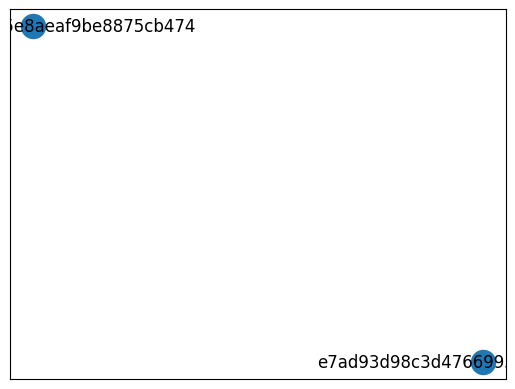

In [14]:
action_graph_service.store.graph.visualize()

In [15]:
action_res = Action(
    path="action.execute",
    op="__add__",
    remote_self=action1.result_id,
    args=[action2.result_id],
    kwargs={}
)
action_res

```python
class Action:
  id: str = 3a51e2cc40f74bfebdb0130168ea3790
  path: str = "action.execute"
  op: str = "__add__"
  remote_self: str = 3197f892060f48f2a629c3ffd3f861bb
  args: str = [<LineageID: 3b1c4145b70b4e23a895686a2eb9fde9 - 105679113009000213>]
  kwargs: str = {}
  result_id: str = 88f037fc13e64d099418b3a0fe4a3119

```

In [16]:
action_graph_service.add_action(context=authed_context, action=action_res)

UID: e7ad93d98c3d476699533e5504ec137b
Node: class NodeActionData:
  id: str = e7ad93d98c3d476699533e5504ec137b
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-21 03:16:10
  updated_at: str = None
  credentials: str = 31a2a469eed2477d7705ce3b748d7fdb620b2bfebe4945da861e77bfe3d70c3a

Result Id: 3197f892060f48f2a629c3ffd3f861bb
Found: e7ad93d98c3d476699533e5504ec137b
UID: 7c4eeba2068b45e8aeaf9be8875cb474
Node: class NodeActionData:
  id: str = 7c4eeba2068b45e8aeaf9be8875cb474
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-21 03:16:10
  updated_at: str = None
  credentials: str = 31a2a469eed2477d7705ce3b748d7fdb620b2bfebe4945da861e77bfe3d70c3a

Result Id: 3b1c4145b70b4e23a895686a2eb9fde9
Found: 7c4eeba2068b45e8aeaf9be8875cb474


```python
class NodeActionData:
  id: str = 3a51e2cc40f74bfebdb0130168ea3790
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-21 03:16:10
  updated_at: str = None
  credentials: str = 31a2a469eed2477d7705ce3b748d7fdb620b2bfebe4945da861e77bfe3d70c3a

```

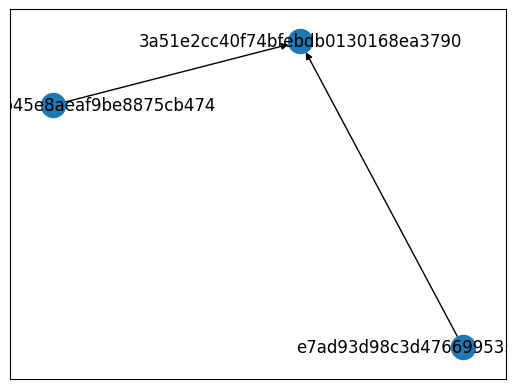

In [17]:
# plt.figure(figsize=(20, 10))
action_graph_service.store.graph.visualize()

In [18]:
action_res_2 = Action(
    path="action.execute",
    op="__mul__",
    remote_self=action_res.result_id,
    args=[action2.result_id],
    kwargs={}
)
action_res

```python
class Action:
  id: str = 3a51e2cc40f74bfebdb0130168ea3790
  path: str = "action.execute"
  op: str = "__add__"
  remote_self: str = 3197f892060f48f2a629c3ffd3f861bb
  args: str = [<LineageID: 3b1c4145b70b4e23a895686a2eb9fde9 - 105679113009000213>]
  kwargs: str = {}
  result_id: str = 88f037fc13e64d099418b3a0fe4a3119

```

In [19]:
action_graph_service.add_action(context=authed_context, action=action_res_2)

UID: e7ad93d98c3d476699533e5504ec137b
Node: class NodeActionData:
  id: str = e7ad93d98c3d476699533e5504ec137b
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-21 03:16:10
  updated_at: str = None
  credentials: str = 31a2a469eed2477d7705ce3b748d7fdb620b2bfebe4945da861e77bfe3d70c3a

Result Id: 3197f892060f48f2a629c3ffd3f861bb
UID: 7c4eeba2068b45e8aeaf9be8875cb474
Node: class NodeActionData:
  id: str = 7c4eeba2068b45e8aeaf9be8875cb474
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-21 03:16:10
  updated_at: str = None
  credentials: str = 31a2a469eed2477d7705ce3b748d7fdb620b2bfebe4945da861e77bfe3d70c3a

Result Id: 3b1c4145b70b4e23a895686a2eb9fde9
Found: 7c4eeba2068b45e8aeaf9be8875cb474
UID: 3a51e2cc40f74bfebdb0130168ea3790
Node: class NodeActionData:
  id: str = 3a51e2cc40f74bfebdb0130168ea3790
  actio

```python
class NodeActionData:
  id: str = aa34ba9e208640099bc9fae761f45470
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-21 03:16:10
  updated_at: str = None
  credentials: str = 31a2a469eed2477d7705ce3b748d7fdb620b2bfebe4945da861e77bfe3d70c3a

```

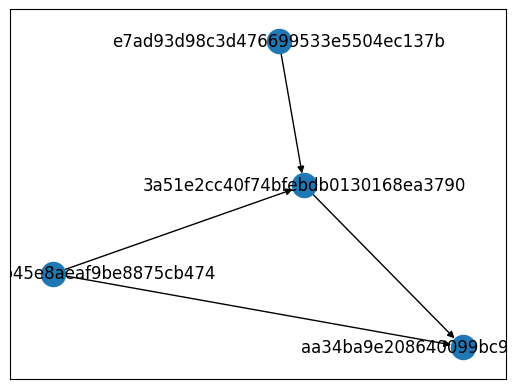

In [20]:
action_graph_service.store.graph.visualize()